# Query Hardness Visualization

This notebook visualizes query hardness metrics from the JSON data file.

Eight scatter plots are generated (all with Recall on x-axis):
- Recall vs Escape Hardness
- Recall vs Frontier Churn
- Recall vs Self-Consistency
- Recall vs NDC (Number of Distance Computations)
- Recall vs Top-k Margin
- Recall vs Top-k Cohesion
- Recall vs Jitter (Micro-Perturbation Stability)
- Recall vs Reachability Probe (τ-Reachability Probe)


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10


In [3]:
# Load data
json_path = '../data/t2i-10M/query_hardness_100queries_with_new_metrics.json'

with open(json_path, 'r') as f:
    data = json.load(f)

queries = data['queries']
stats = data.get('statistics', {})

# Extract metrics
recall = [q['recall'] for q in queries]
escape_hardness = [q['escape_hardness'] for q in queries]
frontier_churn = [q['frontier_churn'] for q in queries]
self_consistency = [q['self_consistency'] for q in queries]
ndc = [q['ndc'] for q in queries]
top_k_margin = [q['top_k_margin'] for q in queries]
top_k_cohesion = [q['top_k_cohesion'] for q in queries]
jitter = [q['jitter'] for q in queries]
reachability_probe = [q['reachability_probe'] for q in queries]

print(f"Loaded {len(queries)} queries")
print(f"\nStatistics:")
for key, value in stats.items():
    if key not in ['avg_hubness_mean', 'avg_hubness_var', 'avg_distance_slope', 
                   'avg_distance_gini', 'avg_signature_dissimilarity']:
        print(f"  {key}: {value}")


Loaded 100 queries

Statistics:
  avg_recall: 0.7497
  avg_escape_hardness: 82.813721
  avg_frontier_churn: 0.019158
  p90_frontier_churn: 0.039604
  avg_self_consistency: 0.140008
  avg_self_consistency_2x: 0.190757
  avg_ndc: 1722.209961
  avg_top_k_margin: 0.000358
  avg_top_k_cohesion: 0.715953
  avg_jitter: 0.5169
  avg_reachability_probe: 0.088667


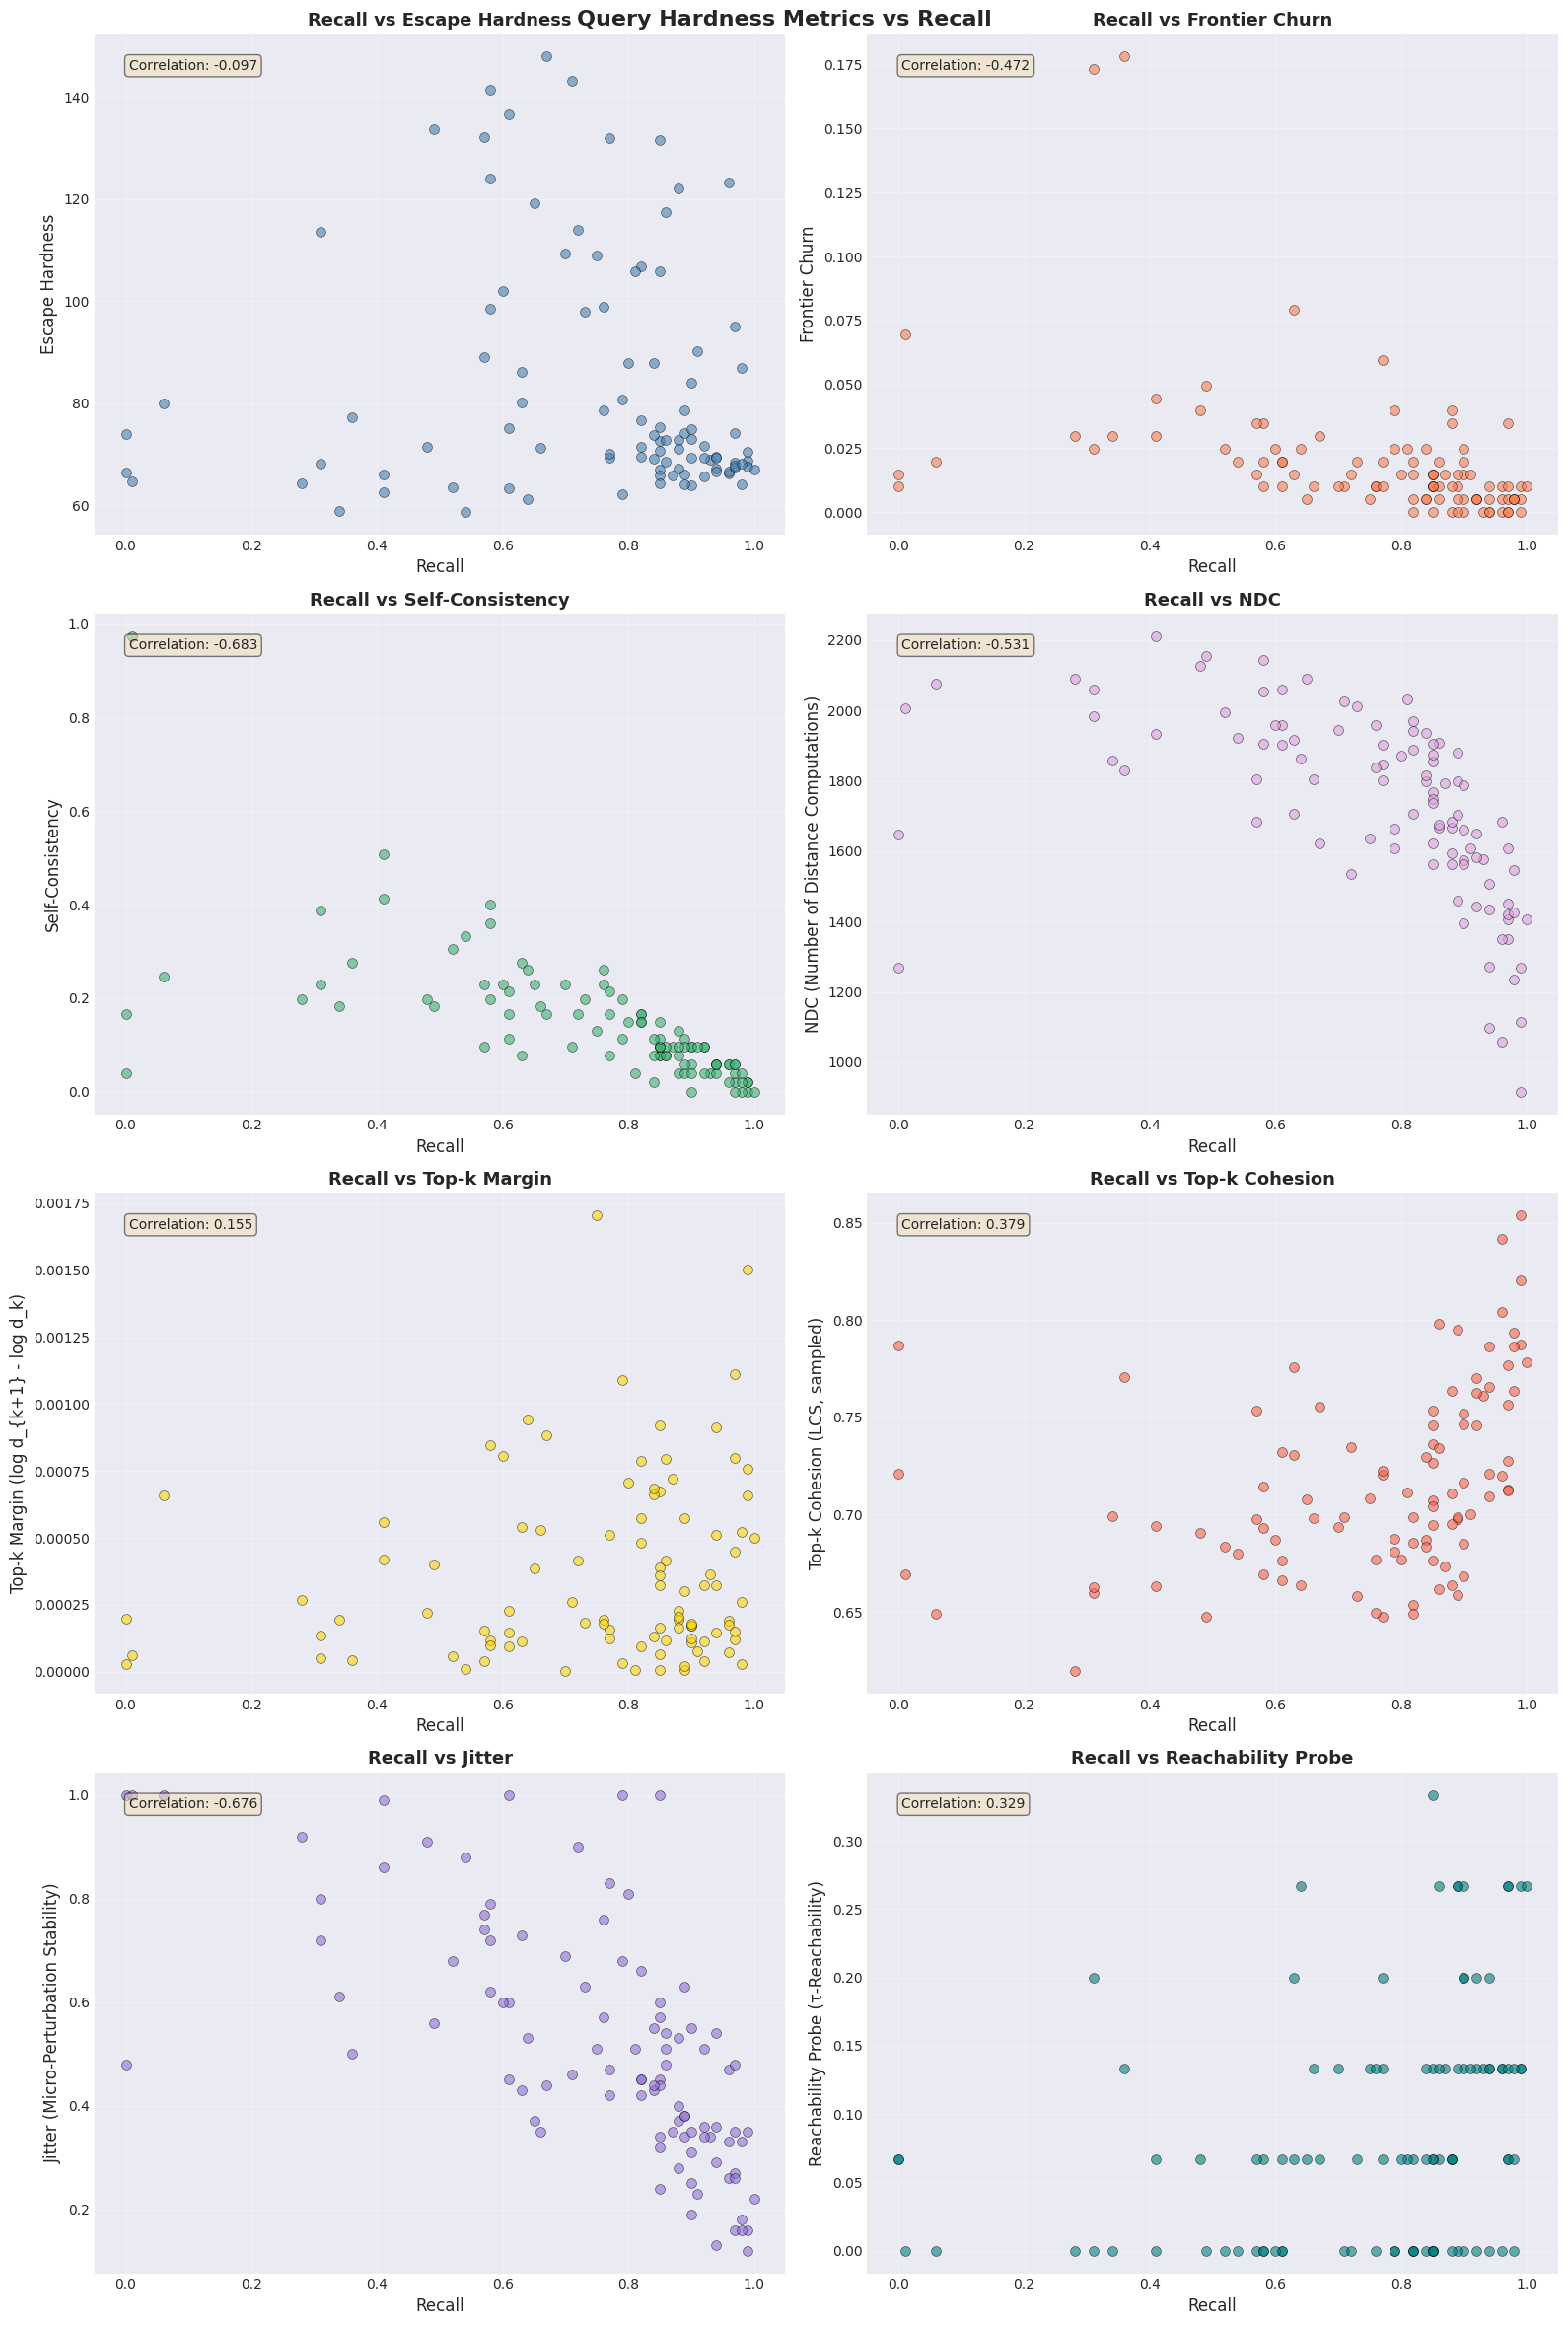


Scatter plots saved to: ../data/t2i-10M/query_hardness_scatter_plots.png


In [4]:
# Create subplots (4 rows x 2 columns for 8 plots)
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
fig.suptitle('Query Hardness Metrics vs Recall', fontsize=16, fontweight='bold')

# Plot 1: Recall vs Escape Hardness
ax1 = axes[0, 0]
ax1.scatter(recall, escape_hardness, alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Recall', fontsize=12)
ax1.set_ylabel('Escape Hardness', fontsize=12)
ax1.set_title('Recall vs Escape Hardness', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add correlation coefficient
corr_eh = np.corrcoef(recall, escape_hardness)[0, 1]
ax1.text(0.05, 0.95, f'Correlation: {corr_eh:.3f}', 
         transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Recall vs Frontier Churn
ax2 = axes[0, 1]
ax2.scatter(recall, frontier_churn, alpha=0.6, s=50, c='coral', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Frontier Churn', fontsize=12)
ax2.set_title('Recall vs Frontier Churn', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add correlation coefficient
corr_fc = np.corrcoef(recall, frontier_churn)[0, 1]
ax2.text(0.05, 0.95, f'Correlation: {corr_fc:.3f}', 
         transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 3: Recall vs Self-Consistency
ax3 = axes[1, 0]
ax3.scatter(recall, self_consistency, alpha=0.6, s=50, c='mediumseagreen', edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Self-Consistency', fontsize=12)
ax3.set_title('Recall vs Self-Consistency', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add correlation coefficient
corr_sc = np.corrcoef(recall, self_consistency)[0, 1]
ax3.text(0.05, 0.95, f'Correlation: {corr_sc:.3f}', 
         transform=ax3.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 4: Recall vs NDC
ax4 = axes[1, 1]
ax4.scatter(recall, ndc, alpha=0.6, s=50, c='plum', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Recall', fontsize=12)
ax4.set_ylabel('NDC (Number of Distance Computations)', fontsize=12)
ax4.set_title('Recall vs NDC', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add correlation coefficient
corr_ndc = np.corrcoef(recall, ndc)[0, 1]
ax4.text(0.05, 0.95, f'Correlation: {corr_ndc:.3f}', 
         transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 5: Recall vs Top-k Margin
ax5 = axes[2, 0]
ax5.scatter(recall, top_k_margin, alpha=0.6, s=50, c='gold', edgecolors='black', linewidth=0.5)
ax5.set_xlabel('Recall', fontsize=12)
ax5.set_ylabel('Top-k Margin (log d_{k+1} - log d_k)', fontsize=12)
ax5.set_title('Recall vs Top-k Margin', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Add correlation coefficient
corr_tkm = np.corrcoef(recall, top_k_margin)[0, 1]
ax5.text(0.05, 0.95, f'Correlation: {corr_tkm:.3f}', 
         transform=ax5.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 6: Recall vs Top-k Cohesion
ax6 = axes[2, 1]
ax6.scatter(recall, top_k_cohesion, alpha=0.6, s=50, c='tomato', edgecolors='black', linewidth=0.5)
ax6.set_xlabel('Recall', fontsize=12)
ax6.set_ylabel('Top-k Cohesion (LCS, sampled)', fontsize=12)
ax6.set_title('Recall vs Top-k Cohesion', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)

# Add correlation coefficient
corr_tkc = np.corrcoef(recall, top_k_cohesion)[0, 1]
ax6.text(0.05, 0.95, f'Correlation: {corr_tkc:.3f}', 
         transform=ax6.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 7: Recall vs Jitter
ax7 = axes[3, 0]
ax7.scatter(recall, jitter, alpha=0.6, s=50, c='mediumpurple', edgecolors='black', linewidth=0.5)
ax7.set_xlabel('Recall', fontsize=12)
ax7.set_ylabel('Jitter (Micro-Perturbation Stability)', fontsize=12)
ax7.set_title('Recall vs Jitter', fontsize=13, fontweight='bold')
ax7.grid(True, alpha=0.3)

# Add correlation coefficient
corr_jitter = np.corrcoef(recall, jitter)[0, 1]
ax7.text(0.05, 0.95, f'Correlation: {corr_jitter:.3f}', 
         transform=ax7.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 8: Recall vs Reachability Probe
ax8 = axes[3, 1]
ax8.scatter(recall, reachability_probe, alpha=0.6, s=50, c='teal', edgecolors='black', linewidth=0.5)
ax8.set_xlabel('Recall', fontsize=12)
ax8.set_ylabel('Reachability Probe (τ-Reachability)', fontsize=12)
ax8.set_title('Recall vs Reachability Probe', fontsize=13, fontweight='bold')
ax8.grid(True, alpha=0.3)

# Add correlation coefficient
corr_rp = np.corrcoef(recall, reachability_probe)[0, 1]
ax8.text(0.05, 0.95, f'Correlation: {corr_rp:.3f}', 
         transform=ax8.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../data/t2i-10M/query_hardness_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nScatter plots saved to: ../data/t2i-10M/query_hardness_scatter_plots.png")
